# Visualizing Differential Equations Using Python
## Willliam Langley

In [1]:
import numpy as np 
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

Set up the beginning and ending time as well as the initial conditions:

In [2]:
t0 = 0
tfinal = 2.
t = np.linspace(t0,tfinal)

We will use a second order ODE as an example.  We pick $y^{\prime\prime} = -2y^\prime + 4y$.

### Initial Conditions: y(0) = 0, y'(0) = b

In [3]:
def ode_fun(t, y):
    f = np.r_[y[1], -2*y[1] + 4*y[0]]
    return f

Text(0, 0.5, '$y$')

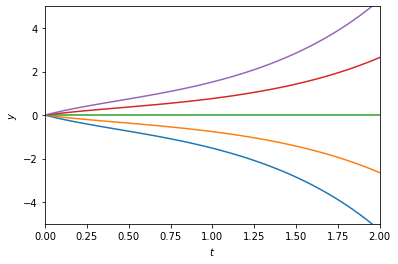

In [4]:
for y0 in np.linspace(-2, 2, 5): #y0 here represents b
    y_initial = [0, y0]
    sol = solve_ivp(ode_fun,[t0,tfinal],y_initial, t_eval=t, method='RK45',atol=1e-13, rtol=1e-13)
    plt.plot(t,sol.y[0,:])
plt.xlim([0, 2])
plt.ylim([-5, 5])
plt.xlabel(r"$t$")
plt.ylabel(r"$y$")

#### Part 2
### Initial Conditions: y(0) = a, y'(0) = 0

Text(0, 0.5, '$y$')

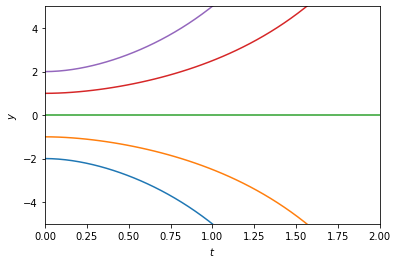

In [5]:
for y0 in np.linspace(-2, 2, 5): #y0 here represents a
    y_initial = [y0, 0]
    sol = solve_ivp(ode_fun,[t0,tfinal],y_initial, t_eval=t, method='RK45',atol=1e-13, rtol=1e-13)
    plt.plot(t,sol.y[0,:])
plt.xlim([0, 2])
plt.ylim([-5, 5])
plt.xlabel(r"$t$")
plt.ylabel(r"$y$")

The first figure's graphs all start from the same point, as their y(0) values are not dynamically allocated like in the second figure. The graphs all still behave the same by diverging away form the X-axis, it's just that their starting point on the Y-axis differs.

# Question 2
What about a forcing function? We pick $y^{\prime\prime} = -2y^\prime + 4y + f(x)$.
$$
f1 = 1
$$
$$
f2 = −1
$$
$$
f3 = cos(5t)
$$
$$
f4 = sin(2t)
$$
$$
f5 = 3 cos(5t) − 0.5 sin(2t)? 
$$

In [6]:
t0 = 0
tfinal = 3.1415926
t = np.linspace(t0,tfinal)
y0 = [0, 0] 
def ode_fun1(t, y):
    f = np.r_[y[1], -2*y[1] + 4*y[0] + 1] #f1
    return f
def ode_fun2(t, y):
    f = np.r_[y[1], -2*y[1] + 4*y[0] + -1] #f2
    return f
def ode_fun3(t, y):
    f = np.r_[y[1], -2*y[1] + 4*y[0] + np.cos(5*t)] #f3
    return f
def ode_fun4(t, y):
    f = np.r_[y[1], -2*y[1] + 4*y[0] + np.sin(2*t)] #f4
    return f
def ode_fun5(t, y):
    f = np.r_[y[1], -2*y[1] + 4*y[0] + (3*np.cos(5*t) - 0.5*np.sin(2*t))] #f5
    return f

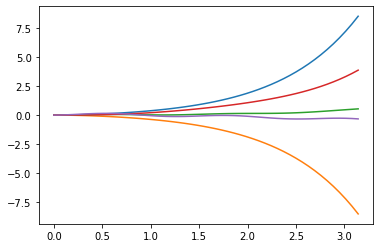

In [7]:
sol1 = solve_ivp(ode_fun1,[t0,tfinal],y0, 
                t_eval=t, method='RK45',atol=1e-13, rtol=1e-13)
sol2 = solve_ivp(ode_fun2,[t0,tfinal],y0, 
                t_eval=t, method='RK45',atol=1e-13, rtol=1e-13)
sol3 = solve_ivp(ode_fun3,[t0,tfinal],y0, 
                t_eval=t, method='RK45',atol=1e-13, rtol=1e-13)
sol4 = solve_ivp(ode_fun4,[t0,tfinal],y0, 
                t_eval=t, method='RK45',atol=1e-13, rtol=1e-13)
sol5 = solve_ivp(ode_fun5,[t0,tfinal],y0, 
                t_eval=t, method='RK45',atol=1e-13, rtol=1e-13)

fig, ax = plt.subplots(1,1)
ax.plot(t,sol1.y[0,:])
ax.plot(t,sol2.y[0,:])
ax.plot(t,sol3.y[0,:])
ax.plot(t,sol4.y[0,:])
ax.plot(t,sol5.y[0,:])

# Question 3
#### Part 1, Harmonic Motion
$$
y^{\prime\prime} + w^{2}y = 0
$$
$$
or
$$
$$
y^{\prime\prime} = -w^{2}y
$$

### Initial Conditions: y(0) = 1, y'(0) = 0

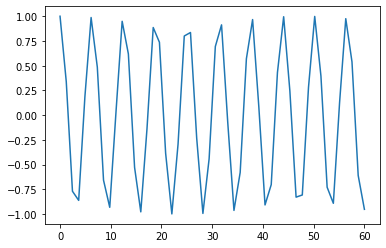

In [8]:
t0 = 0
tfinal = 60
t = np.linspace(t0,tfinal)
y0 = [1, 0] 
omega = 1

def ode_harmonic(t, y):
    f = np.r_[y[1],-omega*omega*y[0]]
    return f

sol = solve_ivp(ode_harmonic,[t0,tfinal],y0 ,t_eval=t, method='RK45',atol=1e-13, rtol=1e-13)

fig, ax = plt.subplots(1,1)
ax.plot(t,sol.y[0,:])

#### Part 2, Dampened Oscilator
$$
y^{\prime\prime} + ϵy^{\prime} + w^{2}y = 0
$$
$$
or
$$
$$
y^{\prime\prime} = -ϵy^{\prime} - w^{2}y
$$

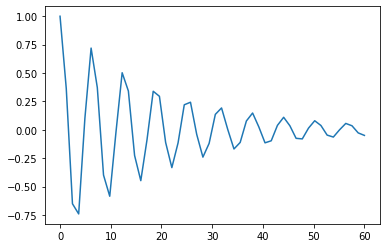

In [9]:
t0 = 0
tfinal = 60
t = np.linspace(t0,tfinal)
y0 = [1, 0] 
omega = 1
gamma = 0.1

def ode_dampened(t, y):
    f = np.r_[y[1],-gamma*y[1]-omega*omega*y[0]]
    return f

sol = solve_ivp(ode_dampened,[t0,tfinal],y0 ,t_eval=t, method='RK45',atol=1e-13, rtol=1e-13)

fig, ax = plt.subplots(1,1)
ax.plot(t,sol.y[0,:])

#### Part 3, Dampened Cont.
$$
Discriminant = ϵ^{2} / 4 - w^{2}
$$

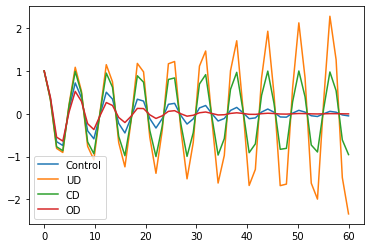

In [10]:
# Underdampened, ϵ2/4−𝑤2 < 0
# Criticallydampened, ϵ2/4−𝑤2 = 0
# Overdampened, ϵ2/4−𝑤2 > 0
t0 = 0
tfinal = 60
t = np.linspace(t0,tfinal)
y0 = [1, 0] 
omega = 1
gamma = 0.1

gammaUD = -.03 #underdampned
gammaCD = 0 #critically dampned
gammaOD = .2 #overdampned

def ode_dampened(t, y):
    f = np.r_[y[1],-gamma*y[1]-omega*omega*y[0]]
    return f

sol = solve_ivp(ode_dampened,[t0,tfinal],y0 ,t_eval=t, method='RK45',atol=1e-13, rtol=1e-13)

def ode_underdampened(t, y):
    f = np.r_[y[1],-gammaUD*y[1]-omega*omega*y[0]]
    return f

sol1 = solve_ivp(ode_underdampened,[t0,tfinal],y0 ,t_eval=t, method='RK45',atol=1e-13, rtol=1e-13)

def ode_criticaldampened(t, y):
    f = np.r_[y[1],-gammaCD*y[1]-omega*omega*y[0]]
    return f

sol2 = solve_ivp(ode_criticaldampened,[t0,tfinal],y0 ,t_eval=t, method='RK45',atol=1e-13, rtol=1e-13)

def ode_overdampened(t, y):
    f = np.r_[y[1],-gammaOD*y[1]-omega*omega*y[0]]
    return f

sol3 = solve_ivp(ode_overdampened,[t0,tfinal],y0 ,t_eval=t, method='RK45',atol=1e-13, rtol=1e-13)


fig, ax = plt.subplots(1,1)
ax.plot(t, sol.y[0,:], label='Control')
ax.plot(t, sol1.y[0,:], label='UD')
ax.plot(t, sol2.y[0,:], label='CD')
ax.plot(t, sol3.y[0,:], label='OD')
ax.legend()




When comparing ϵ values using the dampened oscilator equation, we see quite a few differneces. The underdampened graph has no resistance and progressively oscilates more and more, the critically dampned graph does not flatten out and maintains its shape uniformally throughout the graph, and the over dampened graph "flattens out" much sooner then the control value.

# Question 4
(Grandfather clocks)
$$
d^{2}θ / dt^{2} = (g/L)*sin θ = 0,
$$
$$
d^{2}θ / dt^{2} = (g/L)*θ = 0,
$$

(-5.0, 100.0)

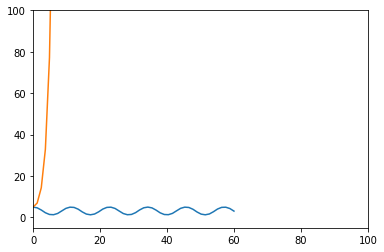

In [11]:
#y = θ

g = 9.8 #gravity
L = 20 #arbitrary length value

y0 = [5, 0]

def ode_pen1(t, y):
    f = np.r_[y[1],(g/L)*np.sin(y[0])]
    return f
def ode_pen2(t, y):
    f = np.r_[y[1],(g/L)*y[0]]
    return f

solpen1 = solve_ivp(ode_pen1,[t0,tfinal],y0 ,t_eval=t, method='RK45',atol=1e-13, rtol=1e-13)

solpen2 = solve_ivp(ode_pen2,[t0,tfinal],y0 ,t_eval=t, method='RK45',atol=1e-13, rtol=1e-13)


fig, ax = plt.subplots(1,1)
ax.plot(t,solpen1.y[0,:])
ax.plot(t,solpen2.y[0,:])
plt.xlim([0, 100])
plt.ylim([-5, 100])


This question involved finding a theta value small enough that both equations would still be similar 